<a href="https://colab.research.google.com/github/Bea2020-Mant/WWCodeDataScience/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load the data
file_path = 'https://raw.githubusercontent.com/WomenWhoCode/WWCodeDataScience/master/Mini_DataScience_BootCamp/data/titanic-train.csv'
df = pd.read_csv(file_path)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape   

(891, 12)

In [0]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.00,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.45,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,0,0,370376,7.75,0,Q


In [0]:
# Check the datatype of features
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
# Feature list 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [0]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [0]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('Age',axis=1)
df=df.fillna(0)

In [0]:
# The df has no Null values
(df['Embarked'].isnull().sum()/len(df)) * 100

0.0

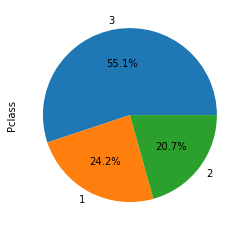

In [0]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

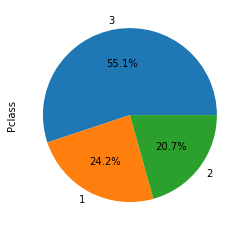

In [0]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

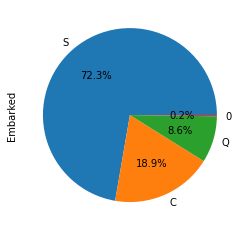

In [0]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

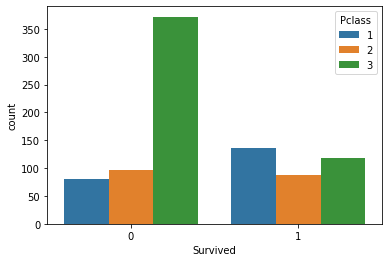

In [0]:
sns.countplot(x='Survived',hue='Pclass',data=df)

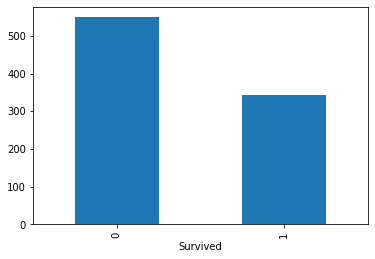

In [0]:
df.groupby(['Survived'])['Pclass'].count().plot(kind='bar')

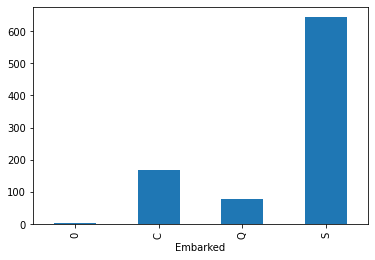

In [0]:
df.groupby(['Embarked'])['Pclass'].count().plot(kind='bar')

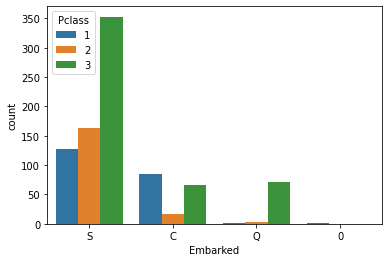

In [0]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

In [0]:
# Split data into train test set in train:test=70:30 size
train, test = train_test_split(df, test_size=0.3, random_state = 42)

In [0]:
train.shape

(623, 11)

In [0]:
test.shape

(268, 11)

In [0]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


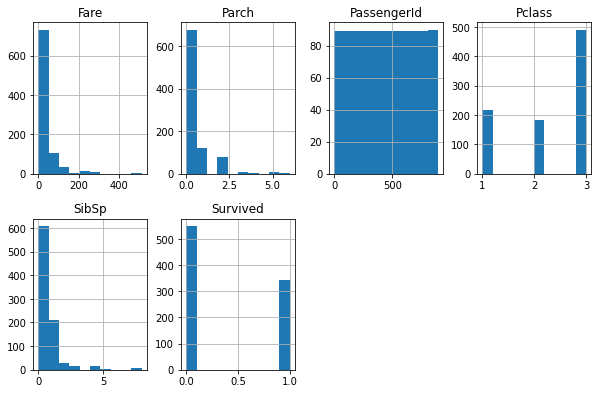

In [0]:
hist = df.hist(figsize=(10,10),layout=(3,4))

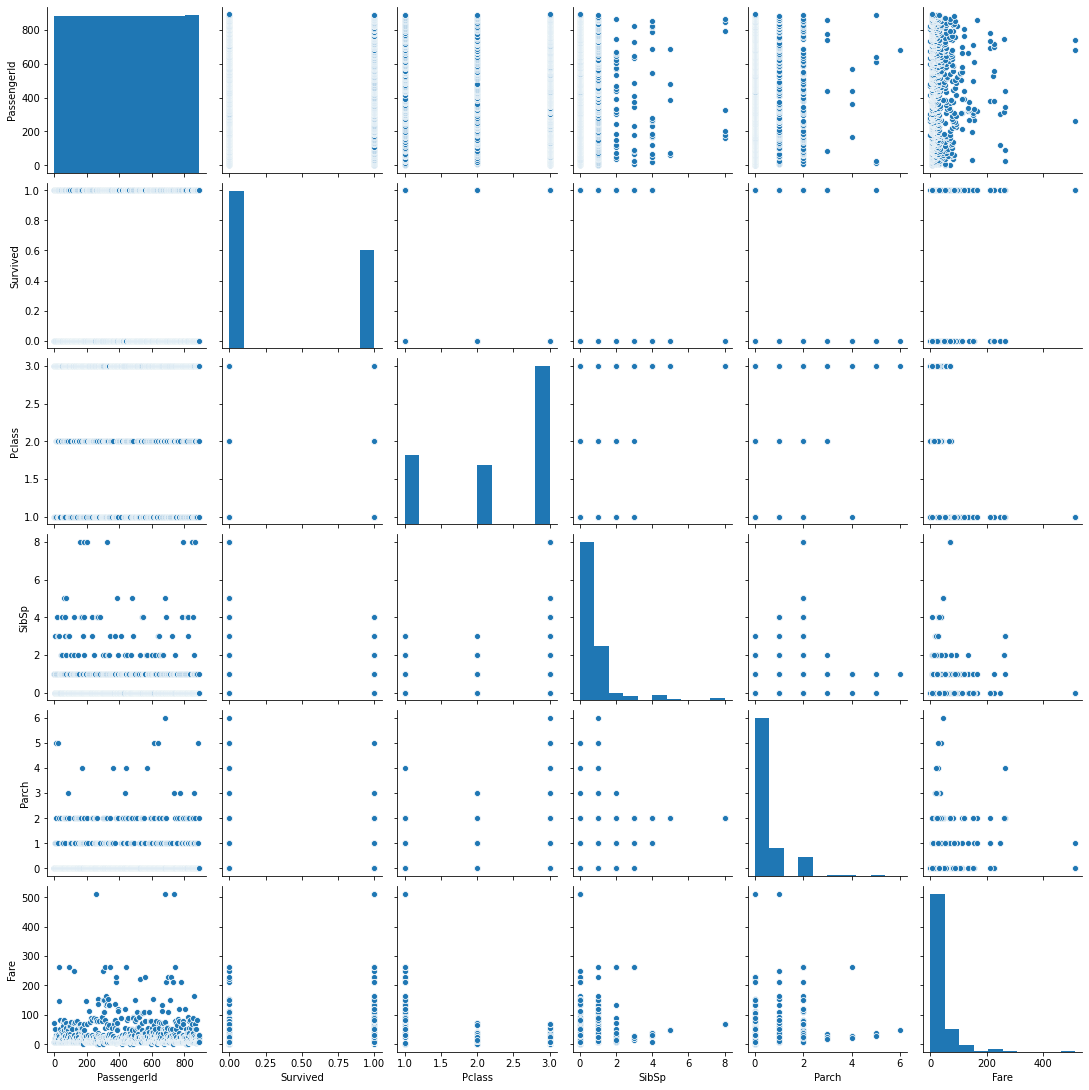

In [0]:
sns.pairplot(df)
plt.show()

In [0]:
#correlations
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


In [0]:
#There are 2 columns for SibSp, Parch. Combine them for total number of relatives on board
df['RelativeCount'] = df['SibSp'] + df['Parch']
df['RelativeCount'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: RelativeCount, dtype: float64

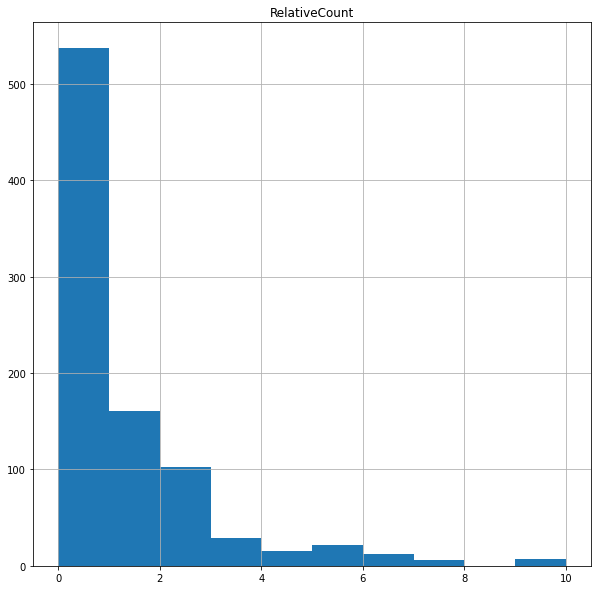

In [0]:
#Lets get a visual distribution too!
#Since its numerical, we pick a historgram for this
hist = df.hist(figsize=(10,10),column='RelativeCount')

In [0]:
#Travel alone or not
df['TravelAlone'] = np.where(df['SibSp']+df['Parch']>0, "No", "Yes")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelativeCount,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,S,0,Yes


In [0]:
df['TravelAlone'].value_counts()

Yes    537
No     354
Name: TravelAlone, dtype: int64

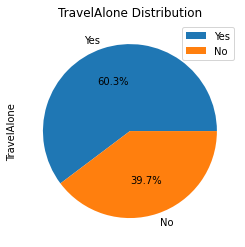

In [0]:
#Lets get a visual distribution too!
#Since its categorical, we pick a pie chart
pie = df['TravelAlone'].value_counts().plot(kind="pie",title='TravelAlone Distribution',legend=True,autopct='%1.1f%%')

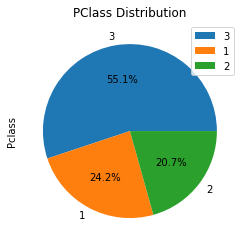

In [0]:
#Lets start off with a bar plot of the Pclass distribution
pie = df['Pclass'].value_counts().plot(kind="pie",title='PClass Distribution',legend=True,autopct='%1.1f%%')

In [0]:
df.groupby(['Pclass','Survived']).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


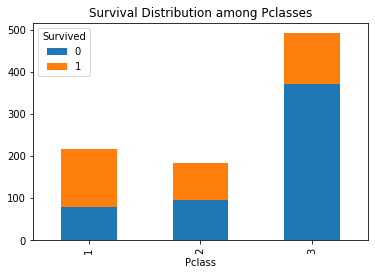

In [0]:
#What is the survival rate among these classes?
df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True,title="Survival Distribution among Pclasses")
ax = plt.show()

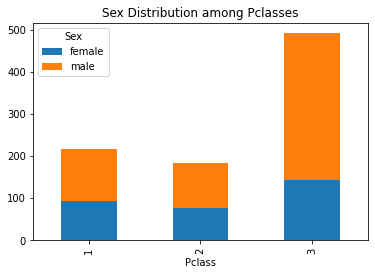

In [0]:
#What is the sex distribution among classes?
df.groupby(['Pclass','Sex']).size().unstack().plot(kind='bar',stacked=True,title="Sex Distribution among Pclasses")
plt.show()